In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat

In [ ]:
mu = -0.5
N = 3
alpha = 0.01
gamma = 1
epochs = 200
p = 0.8
np.random.seed(0)
P = {
    0:{0: (0, 0, True)}, #state:{action: (reward, next state, terminal)}
    1:{0: (mu, 0, True),
       1: (mu, 0, True),
       2: (mu, 0, True),
       3: (mu, 0, True),
       4: (mu, 0, True),
       5: (mu, 0, True),
       6: (mu, 0, True),
       7: (mu, 0, True)}, 
    2:{0: (0, 1, False),
       1: (0, 0, True)}
}

In [ ]:
def rewardnstate(a, s):
    r, state, terminal = P[s][a]
    if s==1:
        r = r + np.random.uniform(-1, 1)
    return r, state, terminal

def act_functn(Q, state, state_visits, nAfes):
    #eps = 0.2
    #eps = 1/np.power(state_visits[state], 0.2)
    eps = 1/np.sqrt(state_visits[state])
    if np.random.choice([True, False], p=[1-eps, eps]):
        action = np.argmax(Q[state, :nAfes[state]])
    else:
        action = np.random.choice(nAfes[state])
    return action

return_dict = {
            0: {0: []},
            1: {
                0: [],
                1: [], 
                2: [],
                3: [],
                4: [],
                5: [],
                6: [],
                7: []
            },
            2: {
                0: [],
                1: []
            }
        }

In [ ]:
def train2(epochs, gamma, rewardnstate, act_functn, P, seed=1, alpha=0.05, return_dict = return_dict):
    def double_Qlearning(Qa, Qb, cumsum, count, count_matrix_a, maximal_value_a, rewardnstate, action, state, reward_list, state_visits):
        reward, next_state, terminal = rewardnstate(action, state)
        cumsum += reward
        count += 1
        alpha_a = 1/np.power(count_matrix_a[state, action], p)
        action_star = np.argmax(Qa[next_state, :nAfes[next_state]])
        Qa[state, action] += alpha_a*(reward + gamma*Qb[next_state, action_star] - Qa[state, action])
        count_matrix_a[state, action] += 1
        state_visits[state] += 1
        maximal_value_a.append(np.max(Qa[start_state, :nAfes[start_state]]))
        maximal_value.append(np.max(Qa[start_state, :nAfes[start_state]]))
        reward_list.append((state, action, reward))
        return reward_list, maximal_value_a, maximal_value, state_visits, count_matrix_a, Qa, next_state, terminal, cumsum, count
    
    def Qlearning(Qa, cumsum, count, count_matrix_a, maximal_value_a, rewardnstate, action, state, reward_list, state_visits):
        reward, next_state, terminal = rewardnstate(action, state)
        cumsum += reward
        count += 1
        alpha_a = 1/np.power(count_matrix_a[state, action], p)
        Qa[state, action] += alpha_a*(reward + gamma*np.max(Qa[next_state, :nAfes[next_state]]) - Qa[state, action])
        count_matrix_a[state, action] += 1
        state_visits[state] += 1
        maximal_value_a.append(np.max(Qa[start_state, :nAfes[start_state]]))
        maximal_value.append(np.max(Qa[start_state, :nAfes[start_state]]))
        reward_list.append((state, action, reward))
        return reward_list, maximal_value_a, maximal_value, state_visits, count_matrix_a, Qa, next_state, terminal, cumsum, count
    
    np.random.seed(seed)
    nS = 3
    nA = 8
    gamma = 1
    count_matrix_a = np.ones([nS, nA])
    count_matrix_b = np.ones([nS, nA])
    state_visits = np.ones(nS)
    maximal_value_a = []
    maximal_value_b = []
    maximal_value = []
    pref_list = []
    pref_learning_list = []
    cumsum = 0
    count = 0
    Qa = np.random.rand(nS, nA)
    Qb = np.random.rand(nS, nA)
    Qa[0] = 0
    Qb[0] = 0
    print("Qa", Qa)
    nAfes = [1, 8, 2] #num_Actions_for_each_state
    start_state = 2
    for i in range(epochs):
        reward_list = []
        state = start_state#state = np.random.choice(nS)
        terminal = True if state==0 else False
        while not terminal:
            if np.random.choice([True, False]):
                action = act_functn(Qa, state, state_visits, nAfes)
                try:
                    stat.variance(return_dict[state][action])
                    x = True
                except:
                    x = False
                if(x):
                    if(stat.variance(return_dict[state][action])<0.4):
                        reward_list, maximal_value_a, maximal_value, state_visits, count_matrix_a, Qa, next_state, terminal, cumsum, count = double_Qlearning(Qa, Qb, cumsum, count, count_matrix_a, maximal_value_a, rewardnstate, action, state, reward_list, state_visits)
                        pref_learning_list.append(1)
                    else:
                        reward_list, maximal_value_a, maximal_value, state_visits, count_matrix_a, Qa, next_state, terminal, cumsum, count = Qlearning(Qa, cumsum, count, count_matrix_a, maximal_value_a, rewardnstate, action, state, reward_list, state_visits)
                        pref_learning_list.append(0)
                else:
                    reward_list, maximal_value_a, maximal_value, state_visits, count_matrix_a, Qa, next_state, terminal, cumsum, count = Qlearning(Qa, cumsum, count, count_matrix_a, maximal_value_a, rewardnstate, action, state, reward_list, state_visits)
                    pref_learning_list.append(0)

            else:
                action = act_functn(Qb, state, state_visits, nAfes)
                try:
                    stat.variance(return_dict[state][action])
                    x = True
                except:
                    x = False
                if(x):
                    if(stat.variance(return_dict[state][action])<0.4):
                        reward_list, maximal_value_b, maximal_value, state_visits, count_matrix_b, Qb, next_state, terminal, cumsum, count = double_Qlearning(Qb, Qa, cumsum, count, count_matrix_b, maximal_value_b, rewardnstate, action, state, reward_list, state_visits)
                        pref_learning_list.append(1)
                    else:
                        reward_list, maximal_value_b, maximal_value, state_visits, count_matrix_b, Qb, next_state, terminal, cumsum, count = Qlearning(Qb, cumsum, count, count_matrix_b, maximal_value_b, rewardnstate, action, state, reward_list, state_visits)
                        pref_learning_list.append(0)
                else:
                    reward_list, maximal_value_b, maximal_value, state_visits, count_matrix_b, Qb, next_state, terminal, cumsum, count = Qlearning(Qb, cumsum, count, count_matrix_b, maximal_value_b, rewardnstate, action, state, reward_list, state_visits)

                    pref_learning_list.append(0)


            state = next_state
            reward_sum = 0
            for i in range(len(reward_list)-1, -1, -1):
                reward_sum = gamma*reward_sum + reward_list[i][2]
                return_dict[reward_list[i][0]][reward_list[i][1]].append(reward_sum)

        pref = .0
        pref += Qa[2][0] - Qa[2][1] #preference of left over right
        pref += Qb[2][0] - Qb[2][1] #preference of left over right
        pref /= float(2)
        pref_list.append(pref)
        reward_list.append(cumsum/count)
    return pref_list, pref_learning_list, Qa, Qb, maximal_value_a, maximal_value_b, maximal_value

In [ ]:
def train(epochs, gamma, rewardnstate, act_functn, P, seed=1, alpha=0.05, return_dict = return_dict):
    def double_Qlearning(Qa, Qb, cumsum, count, count_matrix_a, maximal_value_a, rewardnstate, action, state, reward_list, state_visits):
        reward, next_state, terminal = rewardnstate(action, state)
        cumsum += reward
        count += 1
        alpha_a = 1/np.power(count_matrix_a[state, action], p)
        action_star = np.argmax(Qa[next_state, :nAfes[next_state]])
        Qa[state, action] += alpha_a*(reward + gamma*Qb[next_state, action_star] - Qa[state, action])
        count_matrix_a[state, action] += 1
        state_visits[state] += 1
        maximal_value_a.append(np.max(Qa[start_state, :nAfes[start_state]]))
        maximal_value.append(np.max(Qa[start_state, :nAfes[start_state]]))
        reward_list.append((state, action, reward))
        return reward_list, maximal_value_a, maximal_value, state_visits, count_matrix_a, Qa, next_state, terminal, cumsum, count
    
    def Qlearning(Qa, cumsum, count, count_matrix_a, maximal_value_a, rewardnstate, action, state, reward_list, state_visits):
        reward, next_state, terminal = rewardnstate(action, state)
        cumsum += reward
        count += 1
        alpha_a = 1/np.power(count_matrix_a[state, action], p)
        Qa[state, action] += alpha_a*(reward + gamma*np.max(Qa[next_state, :nAfes[next_state]]) - Qa[state, action])
        count_matrix_a[state, action] += 1
        state_visits[state] += 1
        maximal_value_a.append(np.max(Qa[start_state, :nAfes[start_state]]))
        maximal_value.append(np.max(Qa[start_state, :nAfes[start_state]]))
        reward_list.append((state, action, reward))
        return reward_list, maximal_value_a, maximal_value, state_visits, count_matrix_a, Qa, next_state, terminal, cumsum, count
    
    np.random.seed(seed)
    nS = 3
    nA = 8
    gamma = 1
    count_matrix_a = np.ones([nS, nA])
    count_matrix_b = np.ones([nS, nA])
    state_visits = np.ones(nS)
    maximal_value_a = []
    maximal_value_b = []
    maximal_value = []
    pref_list = []
    pref_learning_list = [] #0: double q learning, 1: q learning 
    cumsum = 0
    count = 0
    Qa = np.random.rand(nS, nA)
    Qb = np.random.rand(nS, nA)
    Qa[0] = 0
    Qb[0] = 0
    print("Qa", Qa)
    nAfes = [1, 8, 2] #num_Actions_for_each_state
    start_state = 2
    for i in range(epochs):
        reward_list = []
        state = start_state#state = np.random.choice(nS)
        terminal = True if state==0 else False
        choice = np.random.choice([True, False])
        if choice:
            action = act_functn(Qa, state, state_visits, nAfes)
            Q = Qa
            count_matrix = count_matrix_a
            maximal_value_v = maximal_value_a
        else:
            action = act_functn(Qb, state, state_visits, nAfes)
            Q = Qb
            count_matrix = count_matrix_b
            maximal_value_v = maximal_value_b
        while not terminal:
            try:
                stat.variance(return_dict[state][action])
                x = True
            except:
                x = False
            if(x):
                if(stat.variance(return_dict[state][action])<0.3):
                    if np.random.choice([True, False]):
                        (reward_list, maximal_value_a,
                         maximal_value, state_visits,
                         count_matrix_a, Qa, next_state,
                         terminal, cumsum, count) = double_Qlearning(Qa, Qb,
                                                                     cumsum, count,
                                                                     count_matrix_a, maximal_value_a,
                                                                     rewardnstate, action,
                                                                     state, reward_list,
                                                                     state_visits)
                        pref_learning_list.append(0)
                        Q = Qa
                        count_matrix = count_matrix_a
                        maximal_value_v = maximal_value_a
                    else:
                        
                        (reward_list, maximal_value_b,
                         maximal_value, state_visits,
                         count_matrix_b, Qb, next_state,
                         terminal, cumsum, count) = double_Qlearning(Qb, Qa,
                                                                     cumsum, count,
                                                                     count_matrix_b, maximal_value_b,
                                                                     rewardnstate, action,
                                                                     state, reward_list, state_visits)
                        pref_learning_list.append(0)
                        Q = Qb
                        count_matrix = count_matrix_b
                        maximal_value_v = maximal_value_b
                else:
                    reward_list, maximal_value_v, maximal_value, state_visits, count_matrix, Q, next_state, terminal, cumsum, count = Qlearning(Qa, cumsum, count, count_matrix_a, maximal_value_a, rewardnstate, action, state, reward_list, state_visits)
                    pref_learning_list.append(1)
                    if choice:
                        count_matrix_a = count_matrix
                        maximal_value_a = maximal_value_v
                        Qa = Q
                    else:
                        count_matrix_b = count_matrix
                        maximal_value_b = maximal_value_v
                        Qb = Q
                    
            else:
                reward_list, maximal_value_v, maximal_value, state_visits, count_matrix, Qa, next_state, terminal, cumsum, count = Qlearning(Qa, cumsum, count, count_matrix_a, maximal_value_a, rewardnstate, action, state, reward_list, state_visits)
                pref_learning_list.append(1)
                if choice:
                    count_matrix_a = count_matrix
                    maximal_value_a = maximal_value_v
                    Qa = Q
                else:
                    count_matrix_b = count_matrix
                    maximal_value_b = maximal_value_v
                    Qb = Q

            
                
            state = next_state
            reward_sum = 0
            for i in range(len(reward_list)-1, -1, -1):
                reward_sum = gamma*reward_sum + reward_list[i][2]
                return_dict[reward_list[i][0]][reward_list[i][1]].append(reward_sum)

        pref = .0
        pref += Qa[2][0] - Qa[2][1] #preference of left over right
        pref += Qb[2][0] - Qb[2][1] #preference of left over right
        pref /= float(2)
        pref_list.append(pref)
        reward_list.append(cumsum/count)
    return pref_list, pref_learning_list, Qa, Qb, maximal_value_a, maximal_value_b, maximal_value

In [ ]:
pref_list, pref_learning_list, Qa, Qb, maximal_value_a, maximal_value_b, maximal_value = train(epochs, gamma, rewardnstate, act_functn, P)

Qa [[0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.39676747 0.53881673 0.41919451 0.6852195  0.20445225 0.87811744
  0.02738759 0.67046751]
 [0.4173048  0.55868983 0.14038694 0.19810149 0.80074457 0.96826158
  0.31342418 0.69232262]]


In [ ]:
pref_learning_array = np.array(pref_learning_list)
maximal_value_array = np.array(maximal_value)
qchosen = (1-pref_learning_array).nonzero()[0]
qchosen_maximal_value = maximal_value_array[qchosen]
dqchosen =pref_learning_array.nonzero()[0]
dqchosen_maximal_value = maximal_value_array[dqchosen]
len(qchosen), len(qchosen_maximal_value), len(dqchosen), len(dqchosen_maximal_value)

(200, 200, 188, 188)

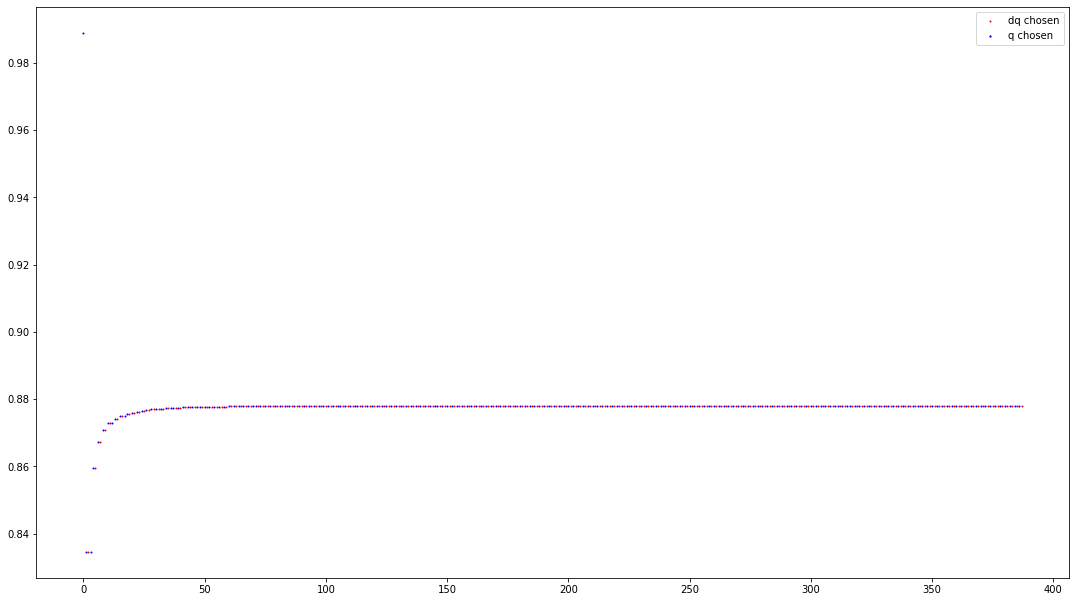

In [ ]:
fig, ax = plt.subplots()
red_dot, = ax.plot(dqchosen, dqchosen_maximal_value, "ro", markersize=1)
blue_dot, = ax.plot(qchosen,qchosen_maximal_value, "bo",  markersize=1)

ax.legend([red_dot, (red_dot, blue_dot)], ["dq chosen", "q chosen"])
fig.set_size_inches(18.5, 10.5, forward=True)

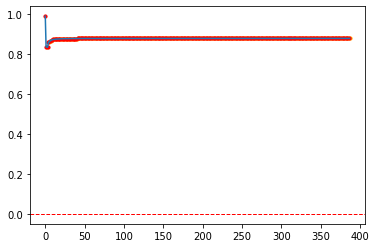

In [ ]:
props = {
    "width": 1,
    "headwidth": 10
}
plt.scatter( dqchosen, dqchosen_maximal_value, s= 10, c = "orange")
plt.scatter(qchosen,qchosen_maximal_value, s= 10, c = "red" )
plt.plot(maximal_value)
plt.axhline(y = max(mu, 0), color = "r", linestyle = "--", linewidth = 1)
#plt.annotate('y = %s' % round(maximal_value[-1], 4), xy=(50000, maximal_value[-1]), xytext=(100000, 5), arrowprops = props)
plt.show()

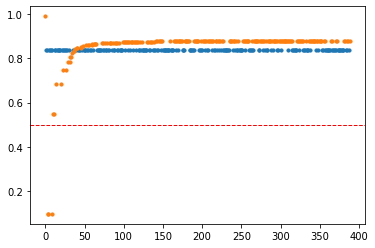

In [ ]:
props = {
    "width": 1,
    "headwidth": 10
}
plt.scatter( dqchosen, dqchosen_maximal_value, s= 10)
plt.scatter(qchosen,qchosen_maximal_value, s= 10)
plt.axhline(y = max(mu, 0), color = "r", linestyle = "--", linewidth = 1)
#plt.annotate('y = %s' % round(maximal_value[-1], 4), xy=(50000, maximal_value[-1]), xytext=(100000, 5), arrowprops = props)
plt.show()

In [ ]:
maximal_value[-100:]

[0.8774850051017092,
 0.8346256718973729,
 0.8774850051017092,
 0.8775054391803393,
 0.8775054391803393,
 0.8775249989648969,
 0.8775249989648969,
 0.8346256718973729,
 0.8346256718973729,
 0.8775437313671753,
 0.8775437313671753,
 0.8346256718973729,
 0.8775437313671753,
 0.8775437313671753,
 0.8775616802647417,
 0.8775616802647417,
 0.8775788867306591,
 0.8775788867306591,
 0.8775953892433012,
 0.8775953892433012,
 0.8776112238781977,
 0.8346256718973729,
 0.8776264244836439,
 0.8776264244836439,
 0.8776410228416184,
 0.8346256718973729,
 0.8776550488153929,
 0.8346256718973729,
 0.8346256718973729,
 0.8346256718973729,
 0.8346256718973729,
 0.8346256718973729,
 0.8776550488153929,
 0.8776685304850724,
 0.8776685304850724,
 0.8346256718973729,
 0.8776685304850724,
 0.8776814942721751,
 0.8776814942721751,
 0.8346256718973729,
 0.8776814942721751,
 0.8346256718973729,
 0.8346256718973729,
 0.8776939650542499,
 0.8346256718973729,
 0.8346256718973729,
 0.8346256718973729,
 0.8777059662

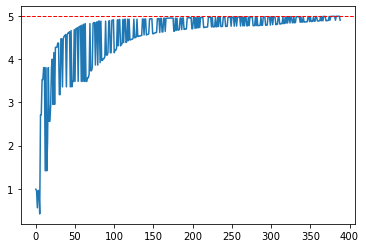

In [ ]:
props = {
    "width": 1,
    "headwidth": 10
}
plt.plot(maximal_value)
plt.axhline(y = max(mu, 0), color = "r", linestyle = "--", linewidth = 1)
#plt.annotate('y = %s' % round(maximal_value[-1], 4), xy=(50000, maximal_value[-1]), xytext=(100000, 5), arrowprops = props)
plt.show()

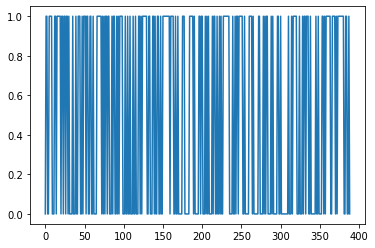

In [ ]:
plt.plot(pref_learning_list)
plt.show()

In [ ]:
return_dict

{0: {0: []},
 1: {0: [1.333722669059457,
   0.4831463185606766,
   -0.2953311423443483,
   -0.4093085428506935,
   -0.44039728363521347,
   -0.2214473054984829,
   -0.16929160576613445,
   1.001624206272311,
   0.7473444141112178,
   0.03985578353005215,
   -0.47666161263821283,
   1.07390294893815,
   1.383673897506845,
   1.0431899960887354,
   -0.19414035489194248,
   0.9180850439856909,
   -0.46835751430688743,
   0.985529660174183,
   -0.03927438325489985,
   -0.4013915104936845,
   0.2926265750260797,
   -0.295729534923614,
   1.4353358573024106,
   -0.3168871166443934,
   -0.46270542125411396,
   1.1142103912375583,
   0.9942432854743692,
   -0.3801646209755767,
   -0.42800112724725947,
   0.08871895026082277,
   -0.3520620129655936,
   1.3774233994090397,
   0.7399114367627595,
   1.1277527303446748,
   0.5636529026719355,
   0.5175774775586757,
   0.4243050257104568,
   -0.07453260377470405,
   -0.1755889793256451,
   -0.21347398767718273,
   1.179290427637219,
   0.9560232868

In [ ]:
#             if():
#                 if np.random.choice([True, False]):
#                     action = act_functn(Qa, state, state_visits)
#                     reward, next_state, terminal = rewardnstate(action, state)
#                     cumsum += reward
#                     count += 1
#                     alpha_a = 1/np.power(count_matrix_a[state, action], p)
#                     action_star = np.argmax(Qa[next_state, :nAfes[next_state]])
#                     Qa[state, action] += alpha_a*(reward + gamma*Qb[next_state, action_star] - Qa[state, action])
#                     count_matrix_a[state, action] += 1
#                     state_visits[state] += 1
#                     maximal_value_a.append(np.max(Qa[start_state, :nAfes[start_state]]))
#                 else:
#                     action = act_functn(Qb, state, state_visits)
#                     reward, next_state, terminal = rewardnstate(action, state)
#                     cumsum += reward
#                     count += 1
#                     action_star = np.argmax(Qb[next_state, :nAfes[next_state]])
#                     alpha_b = 1/np.power(count_matrix_b[state, action], p)
#                     Qb[state, action] += alpha_b*(reward + gamma*Qa[next_state, action_star] - Qb[state, action])
#                     count_matrix_b[state, action] += 1
#                     state_visits[state] += 1
#                     maximal_value_b.append(np.max(Qb[start_state, :nAfes[start_state]]))
#             else:
#                 if np.random.choice([True, False]):
#                     action = act_functn(Qa, state, state_visits)
#                     reward, next_state, terminal = rewardnstate(action, state)
#                     cumsum += reward
#                     count += 1
#                     alpha_a = 1/np.power(count_matrix_a[state, action], p)
#         #             action_star = np.argmax(Qa[next_state, :nAfes[next_state]])
#                     Qa[state, action] += alpha_a*(reward + gamma*np.max(Qa[next_state, :nAfes[next_state]]) - Qa[state, action])
#                     count_matrix_a[state, action] += 1
#                     state_visits[state] += 1
#                     maximal_value_a.append(np.max(Qa[start_state, :nAfes[start_state]]))
#                 else:
#                     action = act_functn(Qb, state, state_visits)
#                     reward, next_state, terminal = rewardnstate(action, state)
#                     cumsum += reward
#                     count += 1
#     #                 action_star = np.argmax(Qb[next_state, :nAfes[next_state]])
#                     alpha_b = 1/np.power(count_matrix_b[state, action], p)
#                     Qb[state, action] += alpha_b*(reward + gamma*np.max(Qb[next_state, :nAfes[next_state]]) - Qb[state, action])
#                     count_matrix_b[state, action] += 1
#                     state_visits[state] += 1
#                     maximal_value_b.append(np.max(Qb[start_state, :nAfes[start_state]]))

In [ ]:
def f():
    print(3)

In [ ]:
a = 2
def h(a):
    
    f()
    print(a)

In [ ]:
h(a)

3
2
